**TEAM CYRO-GEN ZWIFT TTT research**

***Colorborators: join the fun here:***
[Slack](https://join.slack.com/t/vyrtyfy/shared_invite/zt-hhlouu3l-TT5j7d9J5bqd8by4AEdSjQ)
* Vincent Davis

#### TODO's
* find a nice way to identify or estimate the start point (lat, lon).
* normalize (to event average) graph of team power.
* normilize team power based on slope and speed^2 ingnoring acceleration/deceleration
* build some tools/script to make it easy to load/merge a teams data into a dataframe

#### Downloads and installs For google CoLab
This downloadas data file and software from the github repo found here:
[VYRTYFY_research at Github.com](https://github.com/vincentdavis/VYRTYFY_research)



In [2]:
# Get the datafiles, uncomment the next line to reclone the repo.
!rm -r VYRTYFY_research
!git clone https://github.com/vincentdavis/VYRTYFY_research.git
# List the data files
!ls VYRTYFY_research/zwift/Terns/csv/2020-09-10
# calculate distance.
!pip install -r requirments haversine

Cloning into 'VYRTYFY_research'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 138 (delta 26), reused 129 (delta 17), pack-reused 0
Receiving objects: 100% (138/138), 3.43 MiB | 3.19 MiB/s, done.
Resolving deltas: 100% (26/26), done.
David.csv  Joel.csv  Martin.csv  Mike.csv  Sam.csv  Tom.csv


#### Individual rider stats:
It might be best to get individual rider performace stats (heart rate, FTP, 20, 5, .... records) and we could use ZwiftPower to to automate this or manualy get it. What I think is better and simpler is to just calculate and use 5min max values as the normilizing factor.

**Read in and merge the data:**

* Looking at the Terns team first
* Excluding Marin until I get a new data file.

In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
from zttt import merge_activities, rolling_metrics, team_position

# set the path for the data you want
p = Path('zwift/Terns/csv/2020-09-10').glob('**/*')
df, names = merge_activities(p)

df.head(5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
*** zwift/Terns/csv/2020-09-10/Sam.csv
*** zwift/Terns/csv/2020-09-10/Mike.csv
*** zwift/Terns/csv/2020-09-10/Tom.csv
*** zwift/Terns/csv/2020-09-10/Joel.csv
*** zwift/Terns/csv/2020-09-10/Martin.csv
*** zwift/Terns/csv/2020-09-10/David.csv


,Date_Time,Latitude_Sam,Longitude_Sam,Altitude_Sam,Speed_Sam,Cadence_Sam,Power_Sam,Latitude_Mike,Longitude_Mike,Altitude_Mike,...,Heartrate_Martin,Cadence_Martin,Power_Martin,Latitude_David,Longitude_David,Altitude_David,Speed_David,Heartrate_David,Cadence_David,Power_David
0,2020-09-10 11:21:14,53.990345,-1.541703,124.8,12.73,86.0,479.0,53.990346,-1.541734,124.6,...,131,114.0,479.0,53.990341,-1.541594,124.8,10.72,159,112.0,283.0
1,2020-09-10 11:21:15,53.990319,-1.541505,124.8,12.83,86.0,479.0,53.990334,-1.541557,124.8,...,133,116.0,479.0,53.990300,-1.541445,124.8,10.65,161,111.0,283.0
2,2020-09-10 11:21:16,53.990242,-1.541367,125.0,12.85,84.0,450.0,53.990278,-1.541408,124.8,...,135,117.0,362.0,53.990228,-1.541345,125.0,10.50,162,111.0,240.0
3,2020-09-10 11:21:17,53.990139,-1.541290,125.2,12.80,81.0,406.0,53.990189,-1.541316,125.0,...,137,116.0,336.0,53.990142,-1.541285,125.2,10.32,163,111.0,248.0
4,2020-09-10 11:21:18,53.990019,-1.541234,125.4,12.70,79.0,390.0,53.990090,-1.541263,125.2,...,138,118.0,398.0,53.990051,-1.541243,125.4,10.15,164,110.0,248.0


# Rider event stats: *(reworking this)*

In [5]:
stats = rolling_metrics(df, names, hr=False)
print(stats)

# Team Stats
df['total_power'] = df[[f'Power_{n}' for n in names]].sum(axis=1)
print(f"Total power: avg: {df[60:-30]['total_power'].mean():.2f}, max: {df[60:-30]['total_power'].max():.2f}, min: {df[60:-30]['total_power'].min():.2f}")

{'Sam': {'w30min': 80.13333333333334, 'w30max': 424.0, 'w60min': 199.08333333333334, 'w60max': 381.65, 'w300min': 255.2, 'w300max': 346.58483754512633, 'w1200min': 302.13166666666666, 'w1200max': 323.47942905121744}, 'Mike': {'w30min': 61.793103448275865, 'w30max': 417.06666666666666, 'w60min': 214.68333333333334, 'w60max': 401.85, 'w300min': 265.63829787234044, 'w300max': 362.76140350877193, 'w1200min': 308.65784671532845, 'w1200max': 321.64814814814815}, 'Tom': {'w30min': 222.56666666666666, 'w30max': 474.46666666666664, 'w60min': 238.05, 'w60max': 450.2456140350877, 'w300min': 308.38, 'w300max': 387.6550522648084, 'w1200min': 333.97497842968073, 'w1200max': 353.225}, 'Joel': {'w30min': 28.633333333333333, 'w30max': 498.2, 'w60min': 158.61666666666667, 'w60max': 416.26666666666665, 'w300min': 293.87333333333333, 'w300max': 375.6333333333333, 'w1200min': 324.45666666666665, 'w1200max': 342.2195791399817}, 'Martin': {'w30min': 122.76666666666667, 'w30max': 346.8, 'w60min': 136.41666666

# A few initial plots:

*   Normilized 5min max power of each rider: Hard to seee anything here.
*   MISSING SOME DATA: Normalized HR for each rider



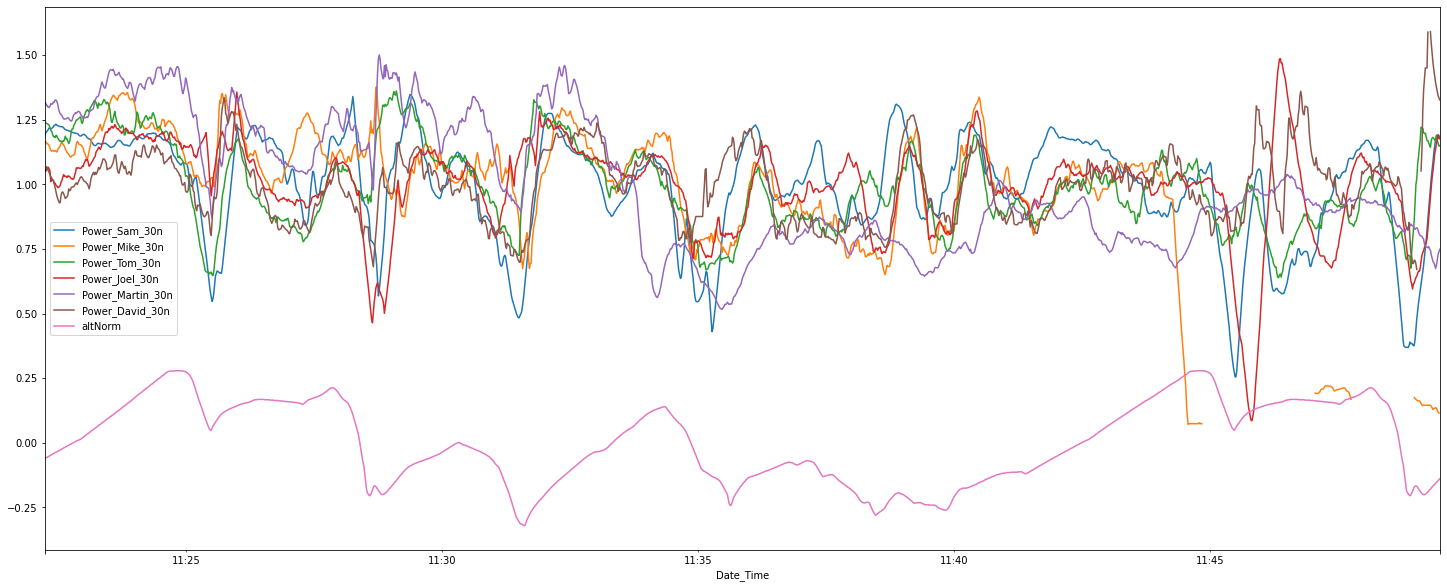

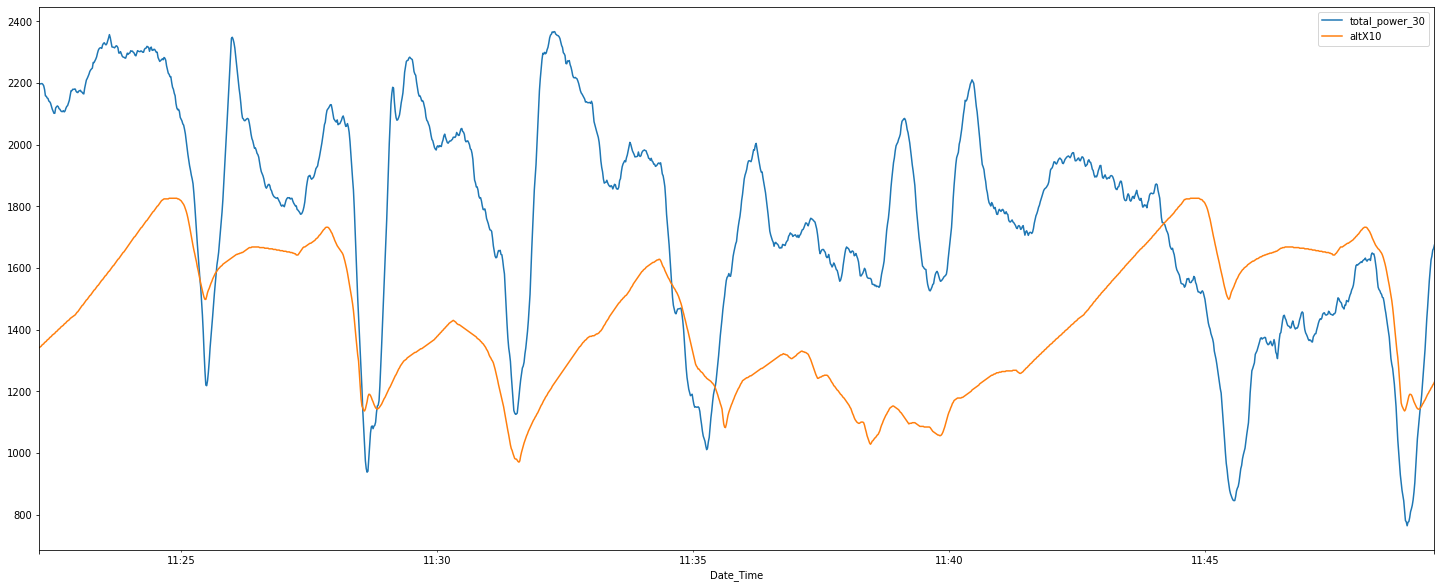

In [6]:
# list of columns with power
pc = [c for c in df.columns if c.split('_')[0]=='Power']
# list of columns with heartrate
# hrc = [c for c in df.columns if c.split('_')[0]=='Heartrate']


# for c in hc: # 30sec rolling hr
#   n = c.split('_')[1]
#   df[f'Heartrate_{n}_30n'] = df[c].rolling(30, min_periods=10).mean()/df[c].mean()

for c in pc: # 30sec rolling Power
  n = c.split('_')[1]
  df[f'Power_{n}_30n'] = df[c].rolling(30, min_periods=10).mean()/df[c].mean()


# hc30 = [c for c in df.columns if c.split('_')[0]=='Heartrate' and c.split('_')[-1]=='30n']
pc30 = [c for c in df.columns if c.split('_')[0]=='Power' and c.split('_')[-1]=='30n']

df['altNorm'] = (df.Altitude_Sam/df.Altitude_Sam.mean())-1 # creat a ampliphied version of the altitude
a = df[60:-30].plot(x='Date_Time', y=pc30, figsize=(25,10))
df[60:-30].plot(x='Date_Time', y='altNorm', figsize=(25,10), ax=a)

# df[60:-30].plot(x='Date_Time', y=hc30, figsize=(25,10))

# df[60:-30].plot(x='Date_Time', y='total_power', figsize=(25,10))

df['altX10'] = df.Altitude_Sam*10 # creat a ampliphied version of the altitude
df['total_power_30'] = df['total_power'].rolling(30).mean()
a = df[60:-30].plot(x='Date_Time', y='total_power_30', figsize=(25,10))
df[60:-30].plot(x='Date_Time', y='altX10', figsize=(25,10), ax=a)


# import matplotlib.pyplot as plt

# fig=plt.figure()
# a=fig.add_axes((0.05,0.05,0.4,0.4)) # number here are coordinate (left,bottom,width,height)
# b=fig.add_axes((0.05,0.5,0.4,0.4))
# c=fig.add_axes((0.5,0.05,0.4,0.85))

# df1.plot('type_of_plot', ax=a);
# df2.plot('type_of_plot', ax=b);
# df3.plot('type_of_plot', ax=c);

# plt.show()

In [45]:
df = team_position(df, names)


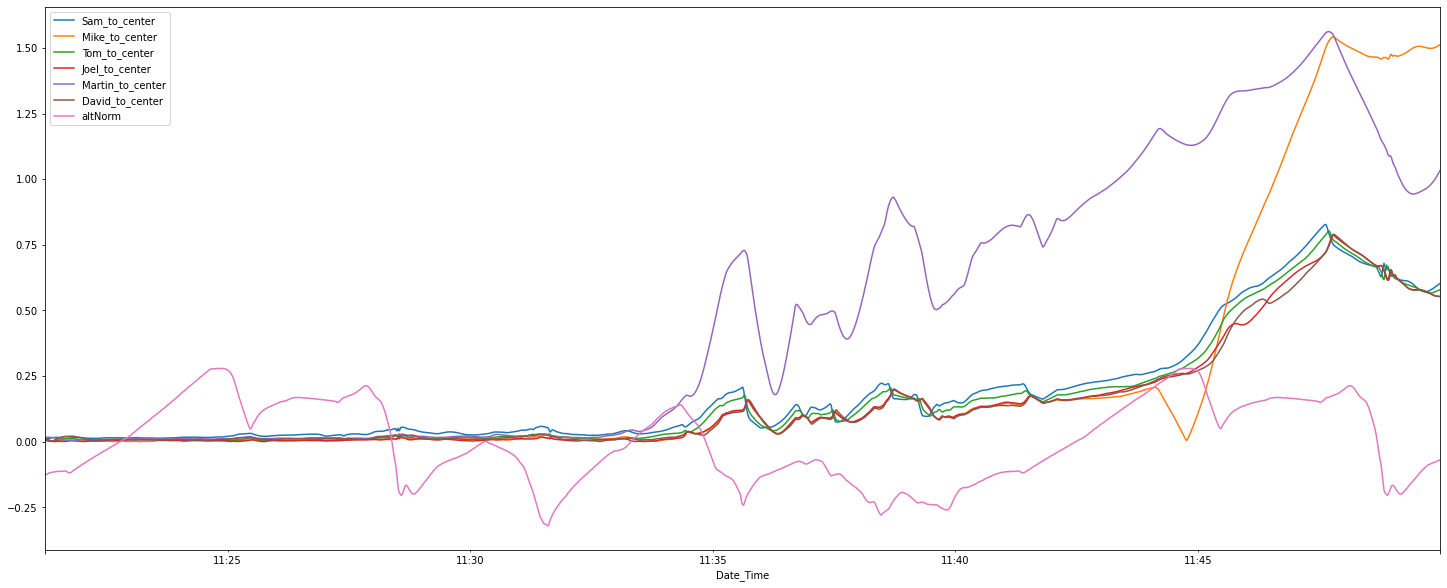

In [48]:
col = [c for c in df.columns if 'to_center' in c]
a = df.plot(x='Date_Time', y=col, figsize=(25,10))
df.plot(x='Date_Time', y='altNorm', figsize=(25,10), ax=a)
df.plot

# **Estimate start line and calculate distance:**

Assume the first 3 seconds(points) after are in a strait line away from the start. From this identify the location of the start line and add this to all riders first position at time -1 sec from there first recorded time. From this calculate cumulative distance.



In [ ]:
df[:5].plot(x='Date_Time', y=['Latitude_nate', 'Latitude_alex', 'Latitude_vincent', 'Latitude_damian'], figsize=(20,20))
df[:5].plot(x='Date_Time', y=['Longitude_nate', 'Longitude_alex', 'Longitude_vincent', 'Longitude_damian'], figsize=(20,20))

In [ ]:
# df[:30].plot(x=['Longitude_nate', 'Longitude_alex', 'Longitude_vincent', 'Longitude_damian'], y=['Latitude_nate', 'Latitude_alex', 'Latitude_vincent', 'Latitude_damian'], figsize=(20,20))
df[:30].plot(x='Longitude_nate', y='Latitude_nate', figsize=(20,20))


In [ ]:
df.plot(x='Date_Time', y='Power_ashley', figsize=(25,10))
df.plot(x='Date_Time', y='Power_szatmari', figsize=(25,10))

In [ ]:
tc

In [15]:
df[lat].mean(axis=1)

0       53.990336
1       53.990330
2       53.990291
3       53.990220
4       53.990122
          ...    
1721    53.986717
1722    53.986765
1723    53.986812
1724    53.986857
1725    53.986903
Length: 1726, dtype: float64